In [1]:
import pandas as pd

In [10]:
solar_data = pd.read_csv('SN_tot_1981.csv', delimiter=';').rename({'daily_sunspot_number': 'wolf'}, axis = 1).fillna(method = 'bfill')
df = solar_data.copy()
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,date,wolf
0,1981-01-01,218
1,1981-01-02,194
2,1981-01-03,168


In [11]:
import matplotlib.pyplot as plt

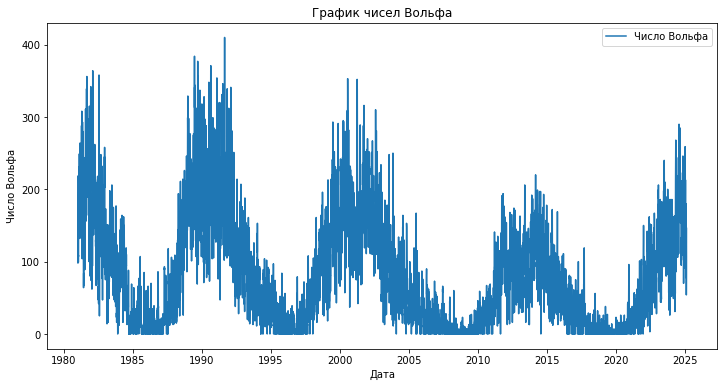

In [12]:
# Задаём размер графика
plt.figure(figsize=(12, 6))

# Построение линейчатого графика временного ряда
plt.plot(df['date'], df['wolf'], label='Число Вольфа')

# Устанавливаем заголовки и легенду
plt.title('График чисел Вольфа')
plt.xlabel('Дата')
plt.ylabel('Число Вольфа')
plt.legend()
plt.show()

In [13]:
import numpy as np

df['time'] = np.arange(len(df.index))
df

,date,wolf,time
0,1981-01-01,218,0
1,1981-01-02,194,1
2,1981-01-03,168,2
3,1981-01-04,155,3
4,1981-01-05,129,4
...,...,...,...
16097,2025-01-27,54,16097
16098,2025-01-28,75,16098
16099,2025-01-29,82,16099
16100,2025-01-30,106,16100


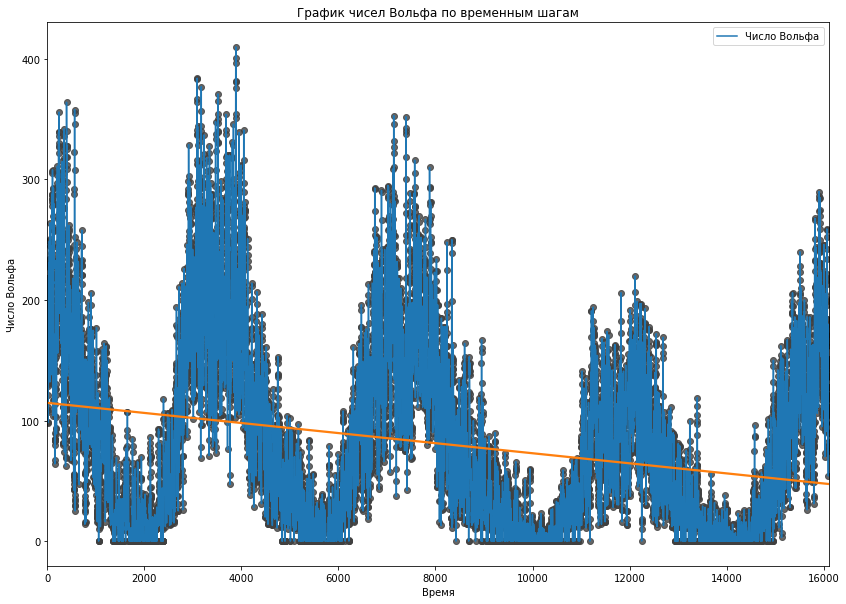

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Задаём размер визуализации
fig, ax = plt.subplots(figsize=(14, 10))

# Построение линейчатого графика временного ряда
ax.plot(df['time'], df['wolf'], label='Число Вольфа')

# Добавление линии регрессии с помощью Seaborn
sns.regplot(x='time', y='wolf', data=df, ci=None, scatter_kws=dict(color='0.25'), ax=ax)

ax.set_title('График чисел Вольфа по временным шагам')
ax.set_xlabel('Время')
ax.set_ylabel('Число Вольфа')
ax.legend()
plt.show() 

In [16]:
df['lag_1'] = df['wolf'].shift(1)
df.head()

,date,wolf,time,lag_1
0,1981-01-01,218,0,NaN
1,1981-01-02,194,1,218.0
2,1981-01-03,168,2,194.0
3,1981-01-04,155,3,168.0
4,1981-01-05,129,4,155.0


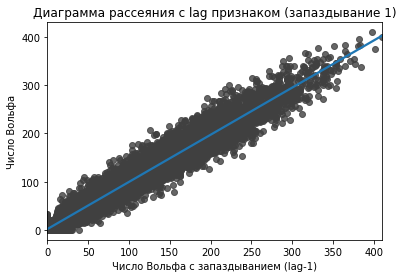

In [17]:
df.dropna(inplace=True)

fig, ax = plt.subplots() 
ax = sns.regplot(x='lag_1', y='wolf', data=df, ci=None, scatter_kws=dict(color='0.25'))

# Устанавливаем заголовок и подписи осей
ax.set_title('Диаграмма рассеяния с lag признаком (запаздывание 1)')
ax.set_xlabel('Число Вольфа с запаздыванием (lag-1)')
ax.set_ylabel('Число Вольфа')

plt.show()

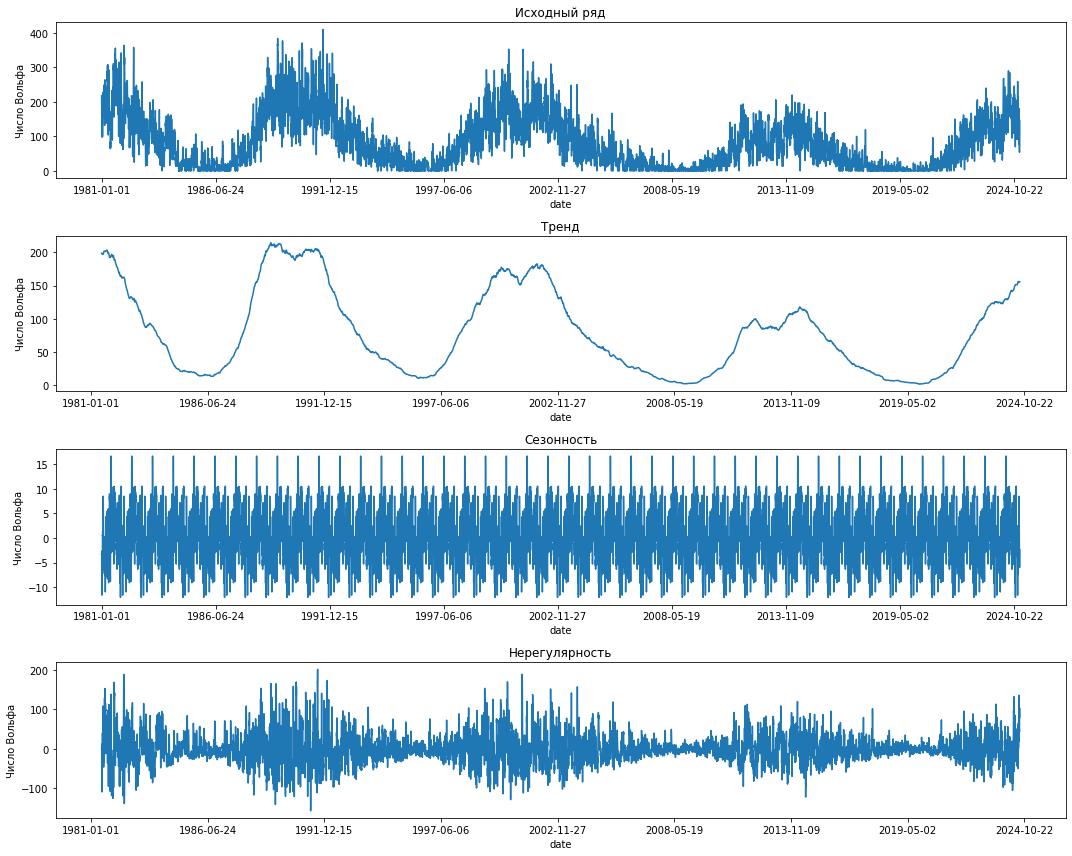

In [20]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Делаем дату индексом
solar_data.set_index('date', inplace=True)

# Декомпозиция временного ряда
decomposition = sm.tsa.seasonal_decompose(solar_data['wolf'], model='additive', period=365)

# Визуализация компонентов временного ряда
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Исходный ряд
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Число Вольфа')
ax1.set_title('Исходный ряд')

# Тренд
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Число Вольфа')
ax2.set_title('Тренд')

# Сезонность
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Число Вольфа')
ax3.set_title('Сезонность')

# Остатки
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Число Вольфа')
ax4.set_title('Нерегулярность')

plt.tight_layout()
plt.show()

In [22]:
# Тест Дикки-Фуллера с поправкой на автокорреляцию (ADF-тест)
from statsmodels.tsa.stattools import adfuller

# Исходный временной ряд
solar_data['wolf']

# ADF-тест
result_adf = adfuller(solar_data['wolf'])
print('ADF Test:')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print(f'Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value}')

ADF Test:
ADF Statistic: -4.374055290905008
p-value: 0.00032983768729662096
Critical Values:
   1%: -3.4307572951577843
   5%: -2.8617200077110776
   10%: -2.5668658136086924


In [23]:
# Тест Квитка-Филлипса-Шмидта-Шина (KPSS-тест)
from statsmodels.tsa.stattools import kpss

# KPSS-тест
result_kpss = kpss(solar_data['wolf'], regression='c')
print('KPSS Test:')
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print(f'Critical Values:')
for key, value in result_kpss[3].items():
    print(f'   {key}: {value}')

KPSS Test:
KPSS Statistic: 4.168482051100227
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/Users/Shared/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/Shared/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


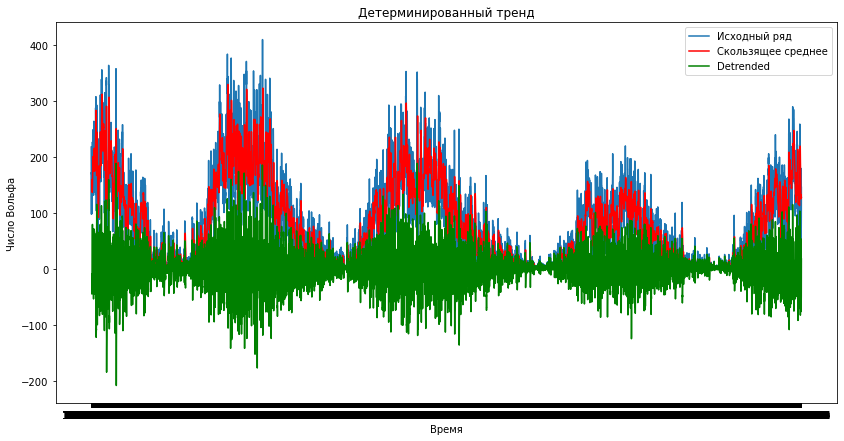

In [25]:
# Установим окно равное 14 (2 недели)
rolling_mean = solar_data['wolf'].rolling(window=14).mean()

# Детерминируем тренд
detrended = solar_data['wolf'] - rolling_mean

plt.figure(figsize=(14, 7))
plt.plot(solar_data['wolf'], label='Исходный ряд')
plt.plot(rolling_mean, label='Скользящее среднее', color='red')
plt.plot(detrended, label='Detrended', color='green')
plt.title('Детерминированный тренд')
plt.xlabel('Время')
plt.ylabel('Число Вольфа')
plt.grid(False) 
plt.legend()
plt.show()

Авторегрессивная модель (Auto-Regressive Model, AR)

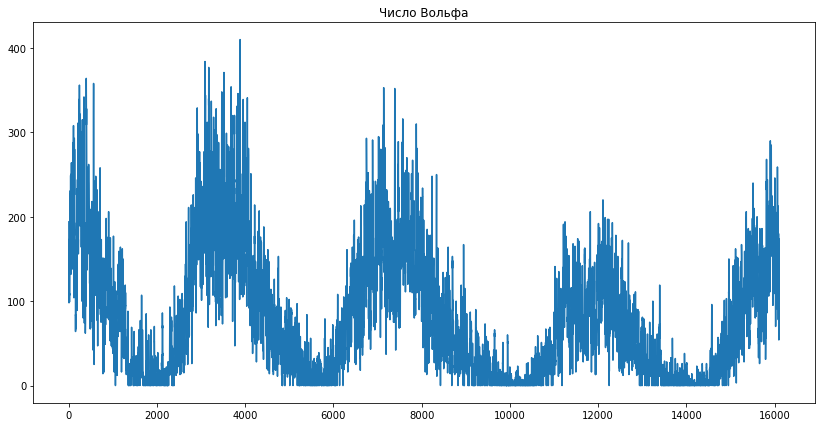

In [27]:
# Временной ряд чисел Вольфа
ts = df['wolf']
ts.plot(title='Число Вольфа', figsize=(14, 7))
plt.show()

In [28]:
# ADF-тест
result_adf = adfuller(ts)
print('ADF Test:')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print(f'Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value}')

ADF Test:
ADF Statistic: -4.384239548742003
p-value: 0.00031648769015640024
Critical Values:
   1%: -3.4307573205274235
   5%: -2.8617200189226457
   10%: -2.566865819576464


так как p-value < 0.05, временной ряд можно считать стационарным

/Users/Shared/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/Shared/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/Shared/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


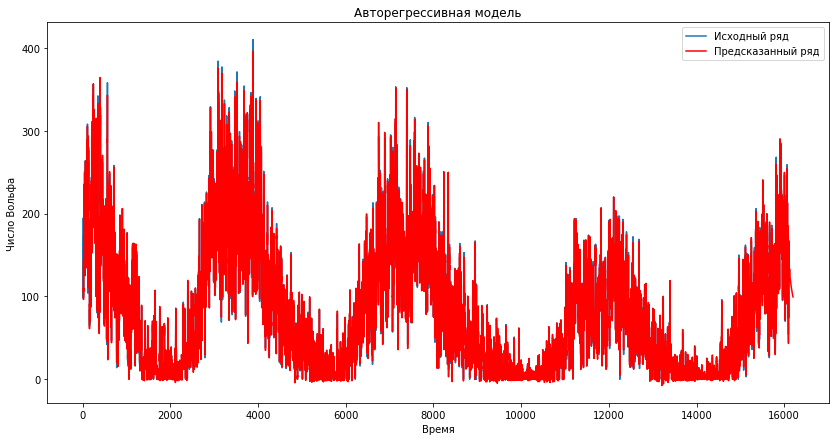

In [107]:
from statsmodels.tsa.ar_model import AutoReg

# Определение и обучение модели AR с лагом 14
model_ar = AutoReg(ts, lags=14).fit()

# Прогнозирование на 100 шагов вперед
forecast_ar = model_ar.predict(start=0, end=len(ts) + 100, dynamic=False)

# Создание индекса для прогнозного периода
forecast_index_ar = pd.date_range(start=ts.index[0], periods=len(forecast_ar))

# Построение графика прогноза
plt.figure(figsize=(14, 7))
plt.plot(ts, label='Исходный ряд')
plt.plot(forecast_ar, label='Предсказанный ряд', color='red')
plt.title('Авторегрессивная модель')
plt.xlabel('Время')
plt.ylabel('Число Вольфа')
plt.legend()
plt.show()

In [35]:
len(ts)

16101

In [36]:
len(forecast_ar)

16202

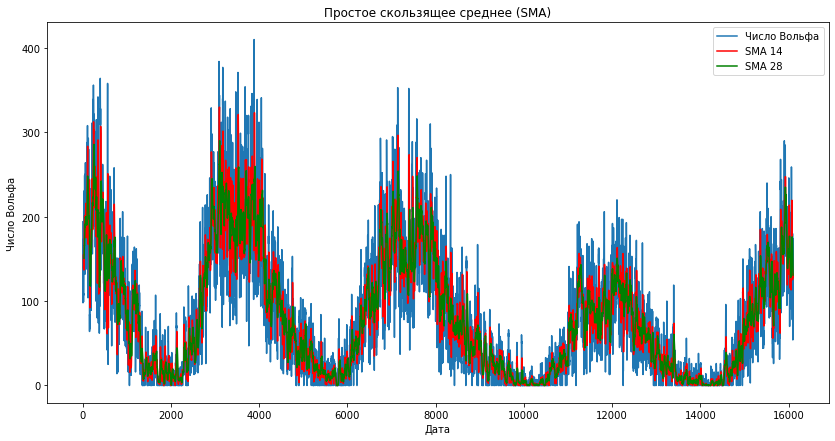

In [37]:
# Параметры для скользящего среднего
window_size_short = 14  # короткий период
window_size_long = 28   # длинный период

# Расчет скользящего среднего
sma_short = ts.rolling(window=window_size_short).mean()
sma_long = ts.rolling(window=window_size_long).mean()

# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(ts, label='Число Вольфа')
plt.plot(sma_short, label=f'SMA {window_size_short}', color='red')
plt.plot(sma_long, label=f'SMA {window_size_long}', color='green')
plt.title('Простое скользящее среднее (SMA)')
plt.xlabel('Дата')
plt.ylabel('Число Вольфа')
plt.legend()
plt.show()

1        194.000000
2        181.000000
3        172.333333
4        161.500000
5        148.800000
            ...    
16097     81.022364
16098     81.021990
16099     81.022051
16100     81.023602
16101     81.027638
Length: 16101, dtype: float64


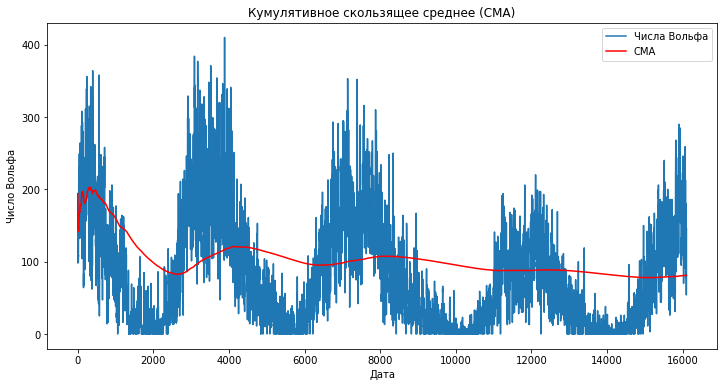

In [38]:
# Рассчитываем кумулятивное скользящее среднее
cma = ts.cumsum() / (pd.Series(range(1, len(ts) + 1), index=ts.index))

# Вывод результаов
print(cma)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Числа Вольфа')
plt.plot(cma, label='CMA', color='red')
plt.title('Кумулятивное скользящее среднее (CMA)')
plt.xlabel('Дата')
plt.ylabel('Число Вольфа')
plt.legend()
plt.show()

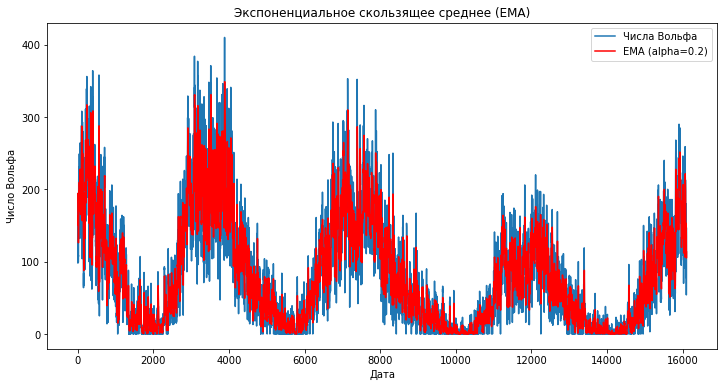

In [39]:
# Коэффициент сглаживания
alpha = 0.2

# Рассчитываем экспоненциальное скользящее среднее
ema = ts.ewm(alpha=alpha, adjust=False).mean()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Числа Вольфа')
plt.plot(ema, label=f'EMA (alpha={alpha})', color='red')
plt.title('Экспоненциальное скользящее среднее (EMA)')
plt.xlabel('Дата')
plt.ylabel('Число Вольфа')
plt.legend()
plt.show()

/Users/Shared/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/Shared/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ig

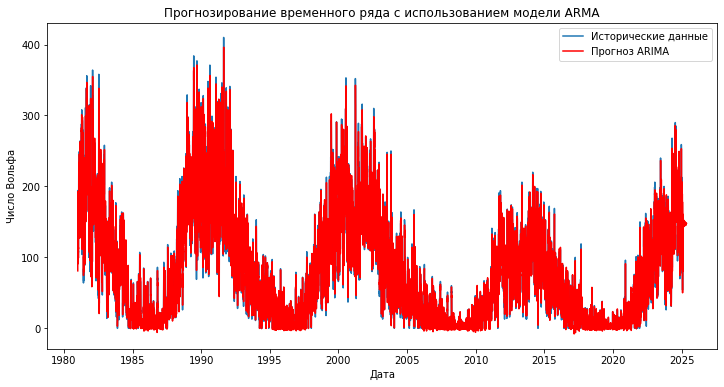

In [85]:
# Оценка модели ARMA
p = 10  # Порядок авторегрессии (AR)
d = 0  # Порядок разностей (d)
q = 10  # Порядок скользящего среднего (MA)
model_arima = sm.tsa.ARIMA(ts, order=(p, d, q)).fit()

# Прогноз на 100 дней вперед
forecast_horizon = 100
forecast_arma = model_arima.predict(start=0, end=len(ts) + forecast_horizon)

# Создание индекса для прогнозного периода
forecast_index_arima = pd.date_range(start=df['date'][1], periods=len(forecast_arma))
ts_index = pd.date_range(start=df['date'][1], periods=len(ts))

# Визуализация исторических данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(ts_index, ts, label='Исторические данные')
plt.plot(forecast_index_arima, forecast_arma, label='Прогноз ARIMA', color='red')
plt.title('Прогнозирование временного ряда с использованием модели ARMA')
plt.xlabel('Дата')
plt.ylabel('Число Вольфа')
plt.legend()
plt.show()

Подсчет аномалий по предсказанию ARMA

In [66]:
error_arma = ts - forecast_arma[1:16102]

In [72]:
data = error_arma.to_numpy()

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = [x for x in data if x < lower_bound or x > upper_bound]
print(len(anomalies))

1102


In [68]:
IQR

5.140903355119704

In [70]:
lower_bound

-10.403031832312898

In [71]:
upper_bound

10.160581588165918

In [94]:
a = np.zeros(len(error_arma))
for i in range(len(error_arma)):
    if data[i] < lower_bound or data[i] > upper_bound:
        a[i] = 1


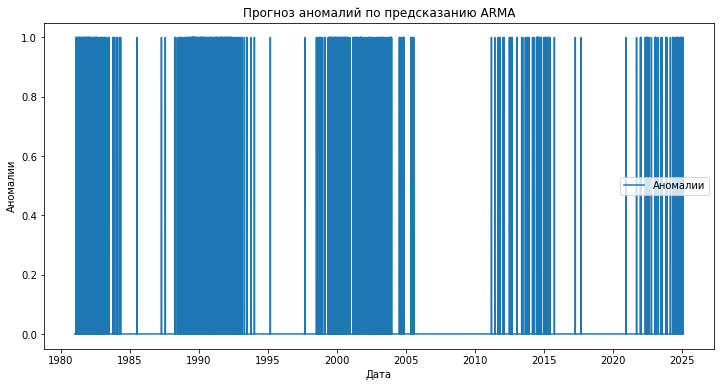

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(ts_index, a, label='Аномалии')
plt.title('Прогноз аномалий по предсказанию ARMA')
plt.xlabel('Дата')
plt.ylabel('Аномалии')
plt.legend()
plt.show()

Подсчет аномалий по предсказанию авторегрессивной модели

In [117]:
error_ar = ts[13:16101] - forecast_ar[14:16102]

In [118]:
data = error_ar.to_numpy()

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = [x for x in data if x < lower_bound or x > upper_bound]
print(len(anomalies))

945


In [119]:
IQR

4.5147737626773905

In [120]:
lower_bound

-9.216851056501412

In [121]:
upper_bound

8.84224399420815

In [125]:
a = np.zeros(len(error_ar))
for i in range(len(error_ar)):
    if data[i] < lower_bound or data[i] > upper_bound:
        a[i] = 1
a_index = pd.date_range(start=df['date'][13], periods=len(error_ar))

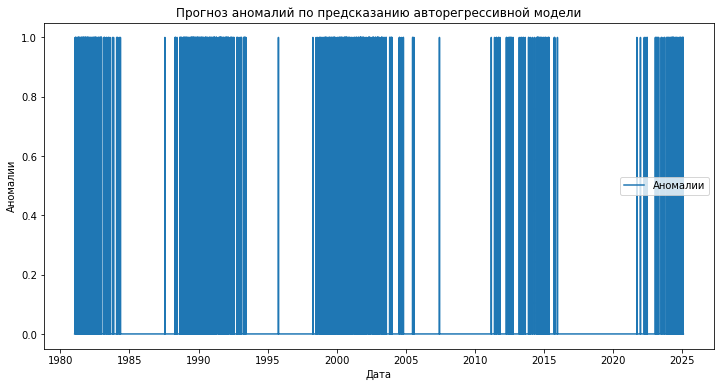

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(a_index, a, label='Аномалии')
plt.title('Прогноз аномалий по предсказанию авторегрессивной модели')
plt.xlabel('Дата')
plt.ylabel('Аномалии')
plt.legend()
plt.show()